In [1]:
import tensorflow as tf
import numpy as np

2021-07-08 23:32:59.302270: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-07-08 23:32:59.302292: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
directory = r'./seg_train/seg_train'
data = tf.keras.preprocessing.image_dataset_from_directory(
    directory, labels='inferred', label_mode='int',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(256,
    256), shuffle=True, seed=None, validation_split=None, subset=None,
    interpolation='bilinear', follow_links=False, smart_resize=False
)

Found 14034 files belonging to 6 classes.


2021-07-08 23:33:01.003940: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-07-08 23:33:01.045025: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-07-08 23:33:01.045446: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce GTX 1650 computeCapability: 7.5
coreClock: 1.56GHz coreCount: 16 deviceMemorySize: 3.82GiB deviceMemoryBandwidth: 119.24GiB/s
2021-07-08 23:33:01.045527: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-07-08 23:33:01.045588: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libc

In [3]:
print(data.class_names)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


2021-07-08 23:33:01.288669: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-07-08 23:33:01.289154: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2400000000 Hz


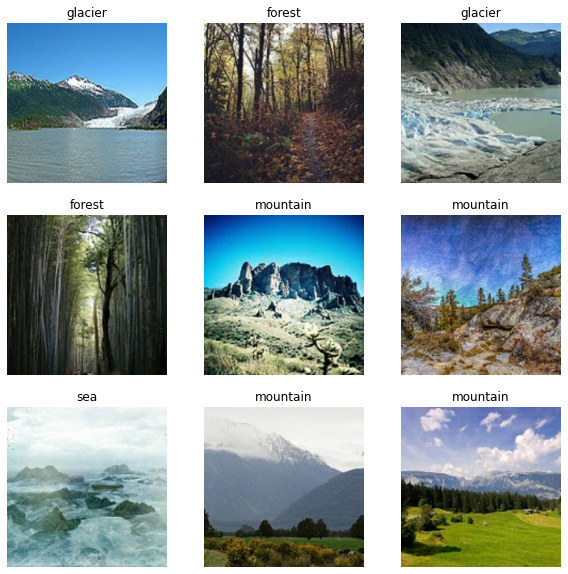

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(data.class_names[labels[i]])
    plt.axis("off")

In [5]:
for i,j in data:
    print(i,'___________________\n',j)

tf.Tensor(
[[[[226.        234.        247.       ]
   [218.42188   225.66406   239.04297  ]
   [206.70312   212.77344   226.73828  ]
   ...
   [ 70.63281   111.66797    35.316406 ]
   [ 81.17969   122.80078    40.589844 ]
   [ 88.        130.         44.       ]]

  [[216.14844   224.14844   236.39062  ]
   [212.30313   219.54532   232.16641  ]
   [206.35678   212.4271    225.63412  ]
   ...
   [ 73.59746   113.13031    39.065506 ]
   [ 83.034256  123.37506    43.672897 ]
   [ 89.13672   130.         46.652344 ]]

  [[200.91406   208.91406   219.98438  ]
   [202.84116   210.08334   221.53256  ]
   [205.8212    211.89151   223.92667  ]
   ...
   [ 78.18196   115.39166    44.863083 ]
   [ 85.902145  124.26312    48.440506 ]
   [ 90.89453   130.         50.753906 ]]

  ...

  [[ 31.316406   47.316406   10.316406 ]
   [ 28.90976    44.90976     7.151947 ]
   [ 25.18814    41.18814     2.2584534]
   ...
   [ 30.199814   60.478592   22.514984 ]
   [ 47.006607   78.41606    41.05899  ]
   [ 

tf.Tensor(
[[[[ 49.          47.          61.        ]
   [ 54.683594    53.441406    66.68359   ]
   [ 63.472656    63.402344    75.47266   ]
   ...
   [ 40.61328     68.61328    131.6836    ]
   [ 34.16797     62.16797    126.41016   ]
   [ 30.          58.         123.        ]]

  [[ 56.578125    54.578125    67.44141   ]
   [ 58.38533     57.143143    69.10504   ]
   [ 61.179977    61.109665    71.67767   ]
   ...
   [ 38.57962     66.18739    126.226456  ]
   [ 36.130585    63.516342   124.72728   ]
   [ 34.546875    61.789062   123.75781   ]]

  [[ 68.296875    66.296875    77.40234   ]
   [ 64.109665    62.867477    72.84955   ]
   [ 57.634598    57.564285    65.80914   ]
   ...
   [ 35.434784    62.43602    117.78758   ]
   [ 39.165558    65.601456   122.12489   ]
   [ 41.578125    67.64844    124.92969   ]]

  ...

  [[117.19141    147.1914     155.1914    ]
   [101.570404   131.5704     139.5704    ]
   [ 77.414215   107.414215   115.414215  ]
   ...
   [ 37.79442     37.794

tf.Tensor(
[[[[155.         160.         164.        ]
   [155.75781    160.75781    164.75781   ]
   [156.92969    161.92969    165.92969   ]
   ...
   [212.92969    217.92969    223.92969   ]
   [211.75781    216.75781    222.75781   ]
   [211.         216.         222.        ]]

  [[155.         160.         164.        ]
   [155.61424    160.61424    164.61424   ]
   [156.5641     161.5641     165.5641    ]
   ...
   [211.42738    216.42738    222.42738   ]
   [210.47752    215.47752    221.47752   ]
   [209.86328    214.86328    220.86328   ]]

  [[155.         160.         164.        ]
   [155.39223    160.39223    164.39223   ]
   [155.99876    160.99876    164.99876   ]
   ...
   [209.10423    214.10423    220.10423   ]
   [208.4977     213.4977     219.4977    ]
   [208.10547    213.10547    219.10547   ]]

  ...

  [[  1.          10.           9.        ]
   [  1.          10.           9.        ]
   [  1.          10.           9.        ]
   ...
   [133.9031     135.903

tf.Tensor(
[[[[141.        158.        150.       ]
   [141.3789    158.3789    150.3789   ]
   [141.96484   158.96484   150.96484  ]
   ...
   [144.        160.        149.       ]
   [144.        160.        149.       ]
   [144.        160.        149.       ]]

  [[141.3789    158.3789    150.3789   ]
   [141.75781   158.75781   150.75781  ]
   [142.34375   159.34375   151.34375  ]
   ...
   [144.36559   160.36559   149.36559  ]
   [144.14357   160.14357   149.14357  ]
   [144.        160.        149.       ]]

  [[141.96484   158.96484   150.96484  ]
   [142.34375   159.34375   151.34375  ]
   [142.92969   159.92969   151.92969  ]
   ...
   [144.93092   160.93092   149.93092  ]
   [144.36559   160.36559   149.36559  ]
   [144.        160.        149.       ]]

  ...

  [[ 38.964844   35.964844   54.964844 ]
   [ 38.978165   35.978165   54.978165 ]
   [ 38.998764   35.998764   54.998764 ]
   ...
   [ 40.929688   37.929688   54.929688 ]
   [ 40.34375    37.34375    54.34375  ]
   [ 

tf.Tensor(
[[[[ 51.        112.        192.       ]
   [ 51.        112.        192.       ]
   [ 51.        112.        192.       ]
   ...
   [ 47.        114.        192.       ]
   [ 47.        114.        192.       ]
   [ 47.        114.        192.       ]]

  [[ 51.        112.        192.       ]
   [ 51.        112.        192.       ]
   [ 51.        112.        192.       ]
   ...
   [ 47.        114.        192.       ]
   [ 47.        114.        192.       ]
   [ 47.        114.        192.       ]]

  [[ 51.        112.        192.       ]
   [ 51.        112.        192.       ]
   [ 51.        112.        192.       ]
   ...
   [ 47.        114.        192.       ]
   [ 47.        114.        192.       ]
   [ 47.        114.        192.       ]]

  ...

  [[102.89453   100.89453    88.89453  ]
   [ 88.77583    86.77583    74.77583  ]
   [ 66.942795   64.942795   52.942795 ]
   ...
   [ 49.75267    81.78783   122.92845  ]
   [ 47.38832    80.009415  123.49379  ]
   [ 

tf.Tensor(
[[[[123.         174.          33.        ]
   [134.36719    180.0625      49.29297   ]
   [151.94531    189.4375      74.48828   ]
   ...
   [100.421875   134.35156     11.28125   ]
   [107.453125   140.21094     15.96875   ]
   [112.         144.          19.        ]]

  [[121.484375   172.86328     33.378906  ]
   [129.98016    176.05438     46.656906  ]
   [143.11798    180.98907     67.189896  ]
   ...
   [106.71527    140.9839      20.898956  ]
   [ 98.649475   131.08018     15.373749  ]
   [ 93.43359    124.67578     11.800781  ]]

  [[119.140625   171.10547     33.964844  ]
   [123.196106   169.85626     42.58052   ]
   [129.46747    167.9245      55.903732  ]
   ...
   [116.44733    151.2401      35.771698  ]
   [ 85.03558    116.960464    14.453644  ]
   [ 64.72266     94.79297      0.66796875]]

  ...

  [[153.53906    129.64453     67.609375  ]
   [147.9354     124.77203     64.305786  ]
   [139.26993    117.23724     59.197144  ]
   ...
   [ 99.237686   163.990

tf.Tensor(
[[[[6.10000000e+01 8.40000000e+01 7.60000000e+01]
   [1.17078125e+02 1.38941406e+02 1.33593750e+02]
   [2.03796875e+02 2.23902344e+02 2.22656250e+02]
   ...
   [1.83828125e+02 1.89828125e+02 2.01828125e+02]
   [2.14296875e+02 2.20296875e+02 2.32296875e+02]
   [2.34000000e+02 2.40000000e+02 2.52000000e+02]]

  [[9.85117188e+01 1.20753906e+02 1.13132812e+02]
   [1.26019424e+02 1.47124893e+02 1.42156143e+02]
   [1.68557114e+02 1.87904770e+02 1.87037582e+02]
   ...
   [1.98796402e+02 2.04796402e+02 2.16796402e+02]
   [2.13502060e+02 2.19502060e+02 2.31502060e+02]
   [2.23011719e+02 2.29011719e+02 2.41011719e+02]]

  [[1.56519531e+02 1.77589844e+02 1.70554688e+02]
   [1.39846176e+02 1.59779770e+02 1.55396957e+02]
   [1.14062637e+02 1.32238419e+02 1.31957169e+02]
   ...
   [2.21943222e+02 2.27943222e+02 2.39943222e+02]
   [2.12272964e+02 2.18272964e+02 2.30272964e+02]
   [2.06019531e+02 2.12019531e+02 2.24019531e+02]]

  ...

  [[9.03515625e+00 6.03515625e+00 0.00000000e+00]
   [9

tf.Tensor(
[[[[2.44000000e+02 2.50000000e+02 2.50000000e+02]
   [2.44378906e+02 2.50378906e+02 2.50378906e+02]
   [2.44964844e+02 2.50964844e+02 2.50964844e+02]
   ...
   [3.30351562e+01 5.00351562e+01 9.30351562e+01]
   [3.36210938e+01 5.06210938e+01 9.36210938e+01]
   [3.40000000e+01 5.10000000e+01 9.40000000e+01]]

  [[2.38695312e+02 2.44695312e+02 2.44695312e+02]
   [2.38643509e+02 2.44643509e+02 2.44643509e+02]
   [2.38563400e+02 2.44563400e+02 2.44563400e+02]
   ...
   [3.29951935e+01 5.00218353e+01 9.30085144e+01]
   [3.29150848e+01 5.03857574e+01 9.31504211e+01]
   [3.28632812e+01 5.06210938e+01 9.32421875e+01]]

  [[2.30492188e+02 2.36492188e+02 2.36492188e+02]
   [2.29774338e+02 2.35774338e+02 2.35774338e+02]
   [2.28664261e+02 2.34664261e+02 2.34664261e+02]
   ...
   [3.29333954e+01 5.00012360e+01 9.29673157e+01]
   [3.18233185e+01 5.00218353e+01 9.24225769e+01]
   [3.11054688e+01 5.00351562e+01 9.20703125e+01]]

  ...

  [[3.50507812e+01 2.90507812e+01 1.54375000e+01]
   [3

tf.Tensor(
[[[[161.         161.         187.        ]
   [138.26562    139.40234    162.75      ]
   [103.109375   106.00391    125.25      ]
   ...
   [155.47266    157.47266    154.47266   ]
   [146.6836     148.6836     145.6836    ]
   [141.         143.         140.        ]]

  [[157.21094    157.21094    182.45312   ]
   [145.53145    146.66817    169.25801   ]
   [127.47038    130.36491    148.8532    ]
   ...
   [152.52133    154.52133    151.52133   ]
   [145.06436    147.06436    144.06436   ]
   [140.24219    142.24219    139.24219   ]]

  [[151.35156    151.35156    175.42188   ]
   [156.76726    157.90398    179.32195   ]
   [165.14204    168.03658    185.35298   ]
   ...
   [147.95743    149.95743    146.95743   ]
   [142.5604     144.5604     141.5604    ]
   [139.07031    141.07031    138.07031   ]]

  ...

  [[113.14453    112.828125   102.93359   ]
   [109.13937    108.82297     98.17062   ]
   [102.94583    102.629425    90.80521   ]
   ...
   [153.26369    136.335

tf.Tensor(
[[[[2.54000000e+02 2.55000000e+02 2.50000000e+02]
   [2.54000000e+02 2.55000000e+02 2.50000000e+02]
   [2.54000000e+02 2.55000000e+02 2.50000000e+02]
   ...
   [2.31964844e+02 2.47964844e+02 2.47964844e+02]
   [2.31378906e+02 2.47378906e+02 2.47378906e+02]
   [2.31000000e+02 2.47000000e+02 2.47000000e+02]]

  [[2.54000000e+02 2.55000000e+02 2.50000000e+02]
   [2.54000000e+02 2.55000000e+02 2.50000000e+02]
   [2.54000000e+02 2.55000000e+02 2.50000000e+02]
   ...
   [2.31978165e+02 2.48735977e+02 2.48735977e+02]
   [2.31614243e+02 2.48372055e+02 2.48372055e+02]
   [2.31378906e+02 2.48136719e+02 2.48136719e+02]]

  [[2.54000000e+02 2.55000000e+02 2.50000000e+02]
   [2.54000000e+02 2.55000000e+02 2.50000000e+02]
   [2.54000000e+02 2.55000000e+02 2.50000000e+02]
   ...
   [2.31998764e+02 2.49928452e+02 2.49928452e+02]
   [2.31978165e+02 2.49907852e+02 2.49907852e+02]
   [2.31964844e+02 2.49894531e+02 2.49894531e+02]]

  ...

  [[4.67382812e+01 2.97382812e+01 2.27382812e+01]
   [5

tf.Tensor(
[[[[ 51.          61.          60.        ]
   [ 47.589844    57.96875     55.83203   ]
   [ 42.316406    53.28125     49.38672   ]
   ...
   [255.         255.         255.        ]
   [255.         255.         255.        ]
   [255.         255.         255.        ]]

  [[ 53.273438    64.03125     62.652344  ]
   [ 49.00186     59.99501     57.622955  ]
   [ 42.39633     53.753403    49.84555   ]
   ...
   [255.         255.         255.        ]
   [255.         255.         255.        ]
   [255.         255.         255.        ]]

  [[ 56.789062    68.71875     66.75391   ]
   [ 51.185394    63.128403    60.392426  ]
   [ 42.519928    54.483536    50.555084  ]
   ...
   [255.         255.         255.        ]
   [255.         255.         255.        ]
   [255.         255.         255.        ]]

  ...

  [[ 63.035156    68.03516     71.03516   ]
   [ 60.36357     65.36357     68.36357   ]
   [ 56.232254    61.232254    64.232254  ]
   ...
   [ 59.25406     60.254

tf.Tensor(
[[[[ 15.         25.         34.       ]
   [ 15.         26.136719   34.       ]
   [ 15.         27.894531   34.       ]
   ...
   [ 27.28125    26.28125    24.28125  ]
   [ 31.96875    30.96875    28.96875  ]
   [ 35.         34.         32.       ]]

  [[ 13.105469   22.726562   31.726562 ]
   [ 17.268997   28.17038    36.03366  ]
   [ 23.707443   36.588654   42.694122 ]
   ...
   [ 19.244293   18.244293   16.244293 ]
   [ 22.5997     21.5997     19.5997   ]
   [ 24.769531   23.769531   21.769531 ]]

  [[ 10.175781   19.210938   28.210938 ]
   [ 20.777756   31.315216   39.178497 ]
   [ 37.17256    50.033173   56.13864  ]
   ...
   [  6.8160095   5.8160095   3.8160095]
   [  8.111481    7.1114807   5.1114807]
   [  8.949219    7.9492188   5.9492188]]

  ...

  [[ 39.5625     44.5625     73.5625   ]
   [ 42.61447    47.248886   76.248886 ]
   [ 47.334015   51.40309    80.40309  ]
   ...
   [ 52.532776   42.532776   41.532776 ]
   [ 47.414978   37.414978   36.414978 ]
   [ 

tf.Tensor(
[[[[1.87000000e+02 1.97000000e+02 1.89000000e+02]
   [1.86621094e+02 1.95484375e+02 1.87484375e+02]
   [1.86035156e+02 1.93140625e+02 1.85140625e+02]
   ...
   [1.55789062e+02 1.83789062e+02 1.84789062e+02]
   [1.52273438e+02 1.80273438e+02 1.81273438e+02]
   [1.50000000e+02 1.78000000e+02 1.79000000e+02]]

  [[1.88136719e+02 1.97000000e+02 1.89000000e+02]
   [1.87614243e+02 1.95915085e+02 1.87484375e+02]
   [1.86806290e+02 1.94237381e+02 1.85140625e+02]
   ...
   [1.56965744e+02 1.85723557e+02 1.87075821e+02]
   [1.54116165e+02 1.82873978e+02 1.83782211e+02]
   [1.52273438e+02 1.81031250e+02 1.81652344e+02]]

  [[1.89894531e+02 1.97000000e+02 1.89000000e+02]
   [1.89150040e+02 1.96581131e+02 1.87484375e+02]
   [1.87998764e+02 1.95933395e+02 1.85140625e+02]
   ...
   [1.58785355e+02 1.88715042e+02 1.90612045e+02]
   [1.56965744e+02 1.86895432e+02 1.87661758e+02]
   [1.55789062e+02 1.85718750e+02 1.85753906e+02]]

  ...

  [[3.96132812e+01 4.46132812e+01 2.16132812e+01]
   [3

tf.Tensor(
[[[[5.00000000e+01 3.80000000e+01 2.40000000e+01]
   [5.60625000e+01 4.55781250e+01 3.27148438e+01]
   [6.54375000e+01 5.72968750e+01 4.61914062e+01]
   ...
   [2.97148438e+01 6.64453125e+00 5.23828125e+00]
   [1.41628906e+02 1.17386719e+02 9.25429688e+01]
   [2.14000000e+02 1.89000000e+02 1.49000000e+02]]

  [[7.38710938e+01 6.22500000e+01 4.67343750e+01]
   [7.30422363e+01 6.26496277e+01 4.82707214e+01]
   [7.17604980e+01 6.32676086e+01 5.06465149e+01]
   ...
   [6.22978210e+01 3.92275085e+01 2.28189392e+01]
   [1.48902130e+02 1.24659943e+02 9.36944885e+01]
   [2.04906250e+02 1.79906250e+02 1.39527344e+02]]

  [[1.10785156e+02 9.97500000e+01 8.18906250e+01]
   [9.92995605e+01 8.90488586e+01 7.23262024e+01]
   [8.15383301e+01 7.25007019e+01 5.75358582e+01]
   ...
   [1.12683868e+02 8.96135559e+01 5.00055237e+01]
   [1.60149384e+02 1.35907196e+02 9.54751892e+01]
   [1.90843750e+02 1.65843750e+02 1.24878906e+02]]

  ...

  [[0.00000000e+00 1.00000000e+00 0.00000000e+00]
   [0

tf.Tensor(
[[[[ 96.          92.          80.        ]
   [ 91.07422     87.83203     75.83203   ]
   [ 83.45703     81.38672     69.38672   ]
   ...
   [ 47.257812    26.398438     7.1523438 ]
   [151.55469    133.03906    109.69141   ]
   [219.         202.         176.        ]]

  [[ 95.62109     92.          78.10547   ]
   [ 86.962494    83.95564     70.63539   ]
   [ 73.57291     71.515915    59.083725  ]
   ...
   [ 54.409668    34.66037     15.048691  ]
   [151.60205    133.75247    110.261246  ]
   [214.45312    197.83203    171.83203   ]]

  [[ 95.03516     92.          75.17578   ]
   [ 80.60416     77.96123     62.59935   ]
   [ 58.288177    56.251785    43.15126   ]
   ...
   [ 65.46924     47.436554    27.259537  ]
   [151.6753     134.85568    111.14244   ]
   [207.42188    191.38672    165.38672   ]]

  ...

  [[ 76.140625    66.10547     41.210938  ]
   [ 68.88812     58.866287    33.200623  ]
   [ 57.672913    47.671677    20.813538  ]
   ...
   [117.43849    108.438

tf.Tensor(
[[[[6.00000000e+01 1.07000000e+02 1.49000000e+02]
   [6.00000000e+01 1.07000000e+02 1.49000000e+02]
   [6.00000000e+01 1.07000000e+02 1.49000000e+02]
   ...
   [5.30000000e+01 1.05000000e+02 1.44000000e+02]
   [5.30000000e+01 1.05000000e+02 1.44000000e+02]
   [5.30000000e+01 1.05000000e+02 1.44000000e+02]]

  [[6.07578125e+01 1.07757812e+02 1.49757812e+02]
   [6.07578125e+01 1.07757812e+02 1.49757812e+02]
   [6.07578125e+01 1.07757812e+02 1.49757812e+02]
   ...
   [5.33789062e+01 1.05378906e+02 1.44378906e+02]
   [5.33789062e+01 1.05378906e+02 1.44378906e+02]
   [5.33789062e+01 1.05378906e+02 1.44378906e+02]]

  [[6.19296875e+01 1.08929688e+02 1.50929688e+02]
   [6.19296875e+01 1.08929688e+02 1.50929688e+02]
   [6.19296875e+01 1.08929688e+02 1.50929688e+02]
   ...
   [5.39648438e+01 1.05964844e+02 1.44964844e+02]
   [5.39648438e+01 1.05964844e+02 1.44964844e+02]
   [5.39648438e+01 1.05964844e+02 1.44964844e+02]]

  ...

  [[3.40703125e+01 5.20703125e+01 6.40703125e+01]
   [3

tf.Tensor(
[[[[2.70000000e+01 8.90000000e+01 4.00000000e+00]
   [3.30625000e+01 9.46835938e+01 1.15781250e+01]
   [4.24375000e+01 1.03472656e+02 2.32968750e+01]
   ...
   [1.91000000e+02 2.26894531e+02 1.82929688e+02]
   [1.91000000e+02 2.25136719e+02 1.81757812e+02]
   [1.91000000e+02 2.24000000e+02 1.81000000e+02]]

  [[3.11679688e+01 9.20312500e+01 8.92578125e+00]
   [3.29233704e+01 9.34077454e+01 1.20532379e+01]
   [3.56379089e+01 9.55363464e+01 1.68895111e+01]
   ...
   [1.85209839e+02 2.20007614e+02 1.75677185e+02]
   [1.83433716e+02 2.17139725e+02 1.73617249e+02]
   [1.82285156e+02 2.15285156e+02 1.72285156e+02]]

  [[3.76132812e+01 9.67187500e+01 1.65429688e+01]
   [3.27082214e+01 9.14347839e+01 1.27879486e+01]
   [2.51230774e+01 8.32637024e+01 6.98121643e+00]
   ...
   [1.76255981e+02 2.09357742e+02 1.64461975e+02]
   [1.71733276e+02 2.04773239e+02 1.61028748e+02]
   [1.68808594e+02 2.01808594e+02 1.58808594e+02]]

  ...

  [[6.28125000e+00 7.28125000e+00 2.28125000e+00]
   [7

tf.Tensor(
[[[[1.20000000e+02 1.77000000e+02 2.30000000e+02]
   [1.18105469e+02 1.77000000e+02 2.29242188e+02]
   [1.15175781e+02 1.77000000e+02 2.28070312e+02]
   ...
   [2.01000000e+02 2.28000000e+02 2.55000000e+02]
   [2.01000000e+02 2.28000000e+02 2.55000000e+02]
   [2.01000000e+02 2.28000000e+02 2.55000000e+02]]

  [[1.16589844e+02 1.75484375e+02 2.27726562e+02]
   [1.16131012e+02 1.76345795e+02 2.28117310e+02]
   [1.15421478e+02 1.77677887e+02 2.28721558e+02]
   ...
   [1.99497696e+02 2.27634415e+02 2.55000000e+02]
   [1.99719711e+02 2.27856430e+02 2.55000000e+02]
   [1.99863281e+02 2.28000000e+02 2.55000000e+02]]

  [[1.11316406e+02 1.73140625e+02 2.24210938e+02]
   [1.13077728e+02 1.75334137e+02 2.26377808e+02]
   [1.15801422e+02 1.78726166e+02 2.29728638e+02]
   ...
   [1.97174545e+02 2.27069077e+02 2.55000000e+02]
   [1.97739883e+02 2.27634415e+02 2.55000000e+02]
   [1.98105469e+02 2.28000000e+02 2.55000000e+02]]

  ...

  [[1.71054688e+01 3.61054688e+01 5.31054688e+01]
   [1

tf.Tensor(
[[[[1.90000000e+02 2.08000000e+02 2.22000000e+02]
   [1.90000000e+02 2.08000000e+02 2.22000000e+02]
   [1.90000000e+02 2.08000000e+02 2.22000000e+02]
   ...
   [1.87964844e+02 2.04964844e+02 2.20964844e+02]
   [1.87378906e+02 2.04378906e+02 2.20378906e+02]
   [1.87000000e+02 2.04000000e+02 2.20000000e+02]]

  [[1.89242188e+02 2.07242188e+02 2.21242188e+02]
   [1.89385757e+02 2.07385757e+02 2.21385757e+02]
   [1.89607773e+02 2.07607773e+02 2.21607773e+02]
   ...
   [1.87978165e+02 2.04978165e+02 2.20978165e+02]
   [1.87614243e+02 2.04614243e+02 2.20614243e+02]
   [1.87378906e+02 2.04378906e+02 2.20378906e+02]]

  [[1.88070312e+02 2.06070312e+02 2.20070312e+02]
   [1.88435898e+02 2.06435898e+02 2.20435898e+02]
   [1.89001236e+02 2.07001236e+02 2.21001236e+02]
   ...
   [1.87998764e+02 2.04998764e+02 2.20998764e+02]
   [1.87978165e+02 2.04978165e+02 2.20978165e+02]
   [1.87964844e+02 2.04964844e+02 2.20964844e+02]]

  ...

  [[7.50312500e+01 7.31718750e+01 5.79257812e+01]
   [4

tf.Tensor(
[[[[130.         170.         206.        ]
   [130.         170.         206.        ]
   [130.         170.         206.        ]
   ...
   [115.         160.         201.        ]
   [115.         160.         201.        ]
   [115.         160.         201.        ]]

  [[130.         170.         206.        ]
   [130.         170.         206.        ]
   [130.         170.         206.        ]
   ...
   [115.37891    160.3789     201.35226   ]
   [115.37891    160.3789     200.90823   ]
   [115.37891    160.3789     200.6211    ]]

  [[130.         170.         206.        ]
   [130.         170.         206.        ]
   [130.         170.         206.        ]
   ...
   [115.96484    160.96484    201.897     ]
   [115.96484    160.96484    200.76633   ]
   [115.96484    160.96484    200.03516   ]]

  ...

  [[ 70.05859     58.058594    46.058594  ]
   [ 71.516495    59.124268    45.648605  ]
   [ 73.77098     60.772217    45.014603  ]
   ...
   [177.74199    178.741

tf.Tensor(
[[[[6.50000000e+01 5.00000000e+01 7.00000000e+00]
   [6.46210938e+01 5.18945312e+01 1.04101562e+01]
   [6.40351562e+01 5.48242188e+01 1.56835938e+01]
   ...
   [1.70664062e+02 1.53593750e+02 1.10593750e+02]
   [1.48398438e+02 1.30156250e+02 8.71562500e+01]
   [1.34000000e+02 1.15000000e+02 7.20000000e+01]]

  [[6.04531250e+01 4.58320312e+01 5.86328125e+00]
   [6.13663483e+01 4.85879822e+01 9.99128723e+00]
   [6.27785492e+01 5.28497620e+01 1.63748016e+01]
   ...
   [2.01913467e+02 1.88891235e+02 1.45120102e+02]
   [1.76317612e+02 1.60125366e+02 1.16132217e+02]
   [1.59765625e+02 1.41523438e+02 9.73867188e+01]]

  [[5.34218750e+01 3.93867188e+01 4.10546875e+00]
   [5.63332367e+01 4.34747620e+01 9.34355164e+00]
   [6.08353424e+01 4.97964783e+01 1.74436798e+01]
   ...
   [2.50237289e+02 2.43474976e+02 1.98511368e+02]
   [2.19491592e+02 2.06469360e+02 1.60940414e+02]
   [1.99609375e+02 1.82539062e+02 1.36644531e+02]]

  ...

  [[3.71757812e+01 2.61757812e+01 8.66796875e+00]
   [2

tf.Tensor(
[[[[231.        238.        231.       ]
   [223.04297   229.66406   223.80078  ]
   [210.73828   216.77344   212.66797  ]
   ...
   [129.        173.        220.       ]
   [129.        173.        220.       ]
   [129.        173.        220.       ]]

  [[230.24219   236.86328   231.       ]
   [218.6959    224.79453   220.06796  ]
   [200.84084   206.1315    203.16275  ]
   ...
   [129.3789    173.3789    220.3789   ]
   [129.3789    173.3789    220.3789   ]
   [129.3789    173.3789    220.3789   ]]

  [[229.07031   235.10547   231.       ]
   [211.97365   217.26431   214.29556  ]
   [185.5355    189.6749    188.46396  ]
   ...
   [129.96484   173.96484   220.96484  ]
   [129.96484   173.96484   220.96484  ]
   [129.96484   173.96484   220.96484  ]]

  ...

  [[136.71875   156.71875   167.71875  ]
   [137.48988   157.48988   168.48988  ]
   [138.68236   158.68236   169.68236  ]
   ...
   [119.19122   134.19122   141.19122  ]
   [152.78192   167.78192   174.78192  ]
   [1

tf.Tensor(
[[[[2.14000000e+02 2.31000000e+02 2.47000000e+02]
   [2.14378906e+02 2.31378906e+02 2.47378906e+02]
   [2.14964844e+02 2.31964844e+02 2.47964844e+02]
   ...
   [1.59386719e+02 1.49562500e+02 1.22492188e+02]
   [1.65832031e+02 1.58937500e+02 1.30695312e+02]
   [1.70000000e+02 1.65000000e+02 1.36000000e+02]]

  [[2.14757812e+02 2.31757812e+02 2.47757812e+02]
   [2.14993149e+02 2.31993149e+02 2.47993149e+02]
   [2.15357071e+02 2.32357071e+02 2.48357071e+02]
   ...
   [1.37555206e+02 1.29206650e+02 1.02555206e+02]
   [1.33787811e+02 1.27702896e+02 1.00545624e+02]
   [1.31351562e+02 1.26730469e+02 9.92460938e+01]]

  [[2.15929688e+02 2.32929688e+02 2.48929688e+02]
   [2.15943008e+02 2.32943008e+02 2.48943008e+02]
   [2.15963608e+02 2.32963608e+02 2.48963608e+02]
   ...
   [1.03795135e+02 9.77285309e+01 7.17248230e+01]
   [8.42348938e+01 7.94019623e+01 5.39223938e+01]
   [7.15859375e+01 6.75507812e+01 4.24101562e+01]]

  ...

  [[5.27343750e-01 5.52734375e+00 1.52734375e+00]
   [4

tf.Tensor(
[[[[1.13000000e+02 1.33000000e+02 1.42000000e+02]
   [1.16789062e+02 1.36031250e+02 1.45410156e+02]
   [1.22648438e+02 1.40718750e+02 1.50683594e+02]
   ...
   [1.06773438e+02 1.10738281e+02 1.22843750e+02]
   [1.19664062e+02 1.23042969e+02 1.36906250e+02]
   [1.28000000e+02 1.31000000e+02 1.46000000e+02]]

  [[1.04664062e+02 1.23906250e+02 1.33285156e+02]
   [1.08740265e+02 1.27511780e+02 1.37126022e+02]
   [1.15043671e+02 1.33087341e+02 1.43065506e+02]
   ...
   [9.04345856e+01 9.59283752e+01 1.07641617e+02]
   [1.08875595e+02 1.14005463e+02 1.27254501e+02]
   [1.20800781e+02 1.25695312e+02 1.39937500e+02]]

  [[9.17734375e+01 1.09843750e+02 1.19808594e+02]
   [9.62936707e+01 1.14337341e+02 1.24315506e+02]
   [1.03283722e+02 1.21286194e+02 1.31284958e+02]
   ...
   [6.51683197e+01 7.30264587e+01 8.41331635e+01]
   [9.21923981e+01 1.00029938e+02 1.12329117e+02]
   [1.09667969e+02 1.17492188e+02 1.30562500e+02]]

  ...

  [[4.09648438e+01 5.10703125e+01 6.00351562e+01]
   [3

tf.Tensor(
[[[[2.18000000e+02 2.19000000e+02 2.14000000e+02]
   [2.16105469e+02 2.17105469e+02 2.12105469e+02]
   [2.13175781e+02 2.14175781e+02 2.09175781e+02]
   ...
   [1.92968750e+00 9.64843750e-01 1.90703125e+01]
   [7.57812500e-01 3.78906250e-01 2.02421875e+01]
   [0.00000000e+00 0.00000000e+00 2.10000000e+01]]

  [[2.17621094e+02 2.18621094e+02 2.13621094e+02]
   [2.16013702e+02 2.17013702e+02 2.12013702e+02]
   [2.13528046e+02 2.14528046e+02 2.09528046e+02]
   ...
   [6.74923096e+01 6.65008240e+01 8.46196136e+01]
   [5.38875732e+01 5.30379944e+01 7.31366119e+01]
   [4.50898438e+01 4.43320312e+01 6.57109375e+01]]

  [[2.17035156e+02 2.18035156e+02 2.13035156e+02]
   [2.15871796e+02 2.16871796e+02 2.11871796e+02]
   [2.14072784e+02 2.15072784e+02 2.10072784e+02]
   ...
   [1.68877808e+02 1.67845123e+02 1.85984512e+02]
   [1.36046997e+02 1.34469574e+02 1.54932114e+02]
   [1.14816406e+02 1.12886719e+02 1.34851562e+02]]

  ...

  [[8.46484375e+00 1.54648438e+01 7.46484375e+00]
   [5

tf.Tensor(
[[[[2.80000000e+01 1.23000000e+02 1.79000000e+02]
   [2.80000000e+01 1.23000000e+02 1.79000000e+02]
   [2.80000000e+01 1.23000000e+02 1.79000000e+02]
   ...
   [1.10000000e+01 1.16000000e+02 1.81000000e+02]
   [1.10000000e+01 1.16000000e+02 1.81000000e+02]
   [1.10000000e+01 1.16000000e+02 1.81000000e+02]]

  [[2.91367188e+01 1.23757812e+02 1.79000000e+02]
   [2.91367188e+01 1.23757812e+02 1.79000000e+02]
   [2.91367188e+01 1.23757812e+02 1.79000000e+02]
   ...
   [1.25156250e+01 1.16771133e+02 1.82110077e+02]
   [1.25156250e+01 1.16993149e+02 1.81666046e+02]
   [1.25156250e+01 1.17136719e+02 1.81378906e+02]]

  [[3.08945312e+01 1.24929688e+02 1.79000000e+02]
   [3.08945312e+01 1.24929688e+02 1.79000000e+02]
   [3.08945312e+01 1.24929688e+02 1.79000000e+02]
   ...
   [1.48593750e+01 1.17963608e+02 1.83826691e+02]
   [1.48593750e+01 1.18528946e+02 1.82696014e+02]
   [1.48593750e+01 1.18894531e+02 1.81964844e+02]]

  ...

  [[8.31757812e+01 4.52109375e+01 0.00000000e+00]
   [9

tf.Tensor(
[[[[6.60000000e+01 1.13000000e+02 1.59000000e+02]
   [6.60000000e+01 1.13000000e+02 1.59000000e+02]
   [6.60000000e+01 1.13000000e+02 1.59000000e+02]
   ...
   [7.10000000e+01 1.16000000e+02 1.57000000e+02]
   [7.10000000e+01 1.16000000e+02 1.57000000e+02]
   [7.10000000e+01 1.16000000e+02 1.57000000e+02]]

  [[6.60000000e+01 1.13000000e+02 1.59000000e+02]
   [6.60000000e+01 1.13000000e+02 1.59000000e+02]
   [6.60000000e+01 1.13000000e+02 1.59000000e+02]
   ...
   [7.06210938e+01 1.15621094e+02 1.56986679e+02]
   [7.06210938e+01 1.15621094e+02 1.56764664e+02]
   [7.06210938e+01 1.15621094e+02 1.56621094e+02]]

  [[6.60000000e+01 1.13000000e+02 1.59000000e+02]
   [6.60000000e+01 1.13000000e+02 1.59000000e+02]
   [6.60000000e+01 1.13000000e+02 1.59000000e+02]
   ...
   [7.00351562e+01 1.15035156e+02 1.56966080e+02]
   [7.00351562e+01 1.15035156e+02 1.56400742e+02]
   [7.00351562e+01 1.15035156e+02 1.56035156e+02]]

  ...

  [[1.25507812e+02 1.31542969e+02 1.29367188e+02]
   [1

tf.Tensor(
[[[[2.12000000e+02 2.11000000e+02 2.16000000e+02]
   [2.12000000e+02 2.11000000e+02 2.16000000e+02]
   [2.12000000e+02 2.11000000e+02 2.16000000e+02]
   ...
   [1.49000000e+02 1.50000000e+02 1.68000000e+02]
   [1.49000000e+02 1.50000000e+02 1.68000000e+02]
   [1.49000000e+02 1.50000000e+02 1.68000000e+02]]

  [[2.12378906e+02 2.11378906e+02 2.16378906e+02]
   [2.12522476e+02 2.11522476e+02 2.16522476e+02]
   [2.12744492e+02 2.11744492e+02 2.16744492e+02]
   ...
   [1.49378906e+02 1.50378906e+02 1.68378906e+02]
   [1.49378906e+02 1.50378906e+02 1.68378906e+02]
   [1.49378906e+02 1.50378906e+02 1.68378906e+02]]

  [[2.12964844e+02 2.11964844e+02 2.16964844e+02]
   [2.13330429e+02 2.12330429e+02 2.17330429e+02]
   [2.13895767e+02 2.12895767e+02 2.17895767e+02]
   ...
   [1.49964844e+02 1.50964844e+02 1.68964844e+02]
   [1.49964844e+02 1.50964844e+02 1.68964844e+02]
   [1.49964844e+02 1.50964844e+02 1.68964844e+02]]

  ...

  [[9.11015625e+01 9.11015625e+01 9.31015625e+01]
   [8

tf.Tensor(
[[[[1.08000000e+02 1.40000000e+02 1.03000000e+02]
   [1.02316406e+02 1.31664062e+02 9.65585938e+01]
   [9.35273438e+01 1.18773438e+02 8.65976562e+01]
   ...
   [8.63125000e+01 6.91718750e+01 6.22421875e+01]
   [5.81875000e+01 3.87031250e+01 3.29453125e+01]
   [4.00000000e+01 1.90000000e+01 1.40000000e+01]]

  [[9.39804688e+01 1.24464844e+02 8.59492188e+01]
   [9.30346832e+01 1.21440994e+02 8.43891907e+01]
   [9.15721283e+01 1.16764938e+02 8.19767761e+01]
   ...
   [8.44386902e+01 6.87870483e+01 6.22362671e+01]
   [6.29741516e+01 4.45347290e+01 3.91558228e+01]
   [4.90937500e+01 2.88515625e+01 2.42304688e+01]]

  [[7.23007812e+01 1.00441406e+02 5.95820312e+01]
   [7.86815033e+01 1.05632126e+02 6.55705261e+01]
   [8.85485992e+01 1.13659012e+02 7.48310852e+01]
   ...
   [8.15410461e+01 6.81919556e+01 6.22271118e+01]
   [7.03761902e+01 5.35526733e+01 4.87597046e+01]
   [6.31562500e+01 4.40859375e+01 4.00507812e+01]]

  ...

  [[1.11542969e+02 8.35781250e+01 6.96835938e+01]
   [1

tf.Tensor(
[[[[195.        201.        217.       ]
   [195.        201.        217.       ]
   [195.        201.        217.       ]
   ...
   [196.        202.        218.       ]
   [196.        202.        218.       ]
   [196.        202.        218.       ]]

  [[194.6211    200.6211    216.6211   ]
   [194.6211    200.6211    216.6211   ]
   [194.6211    200.6211    216.6211   ]
   ...
   [195.6211    201.6211    217.6211   ]
   [195.6211    201.6211    217.6211   ]
   [195.6211    201.6211    217.6211   ]]

  [[194.03516   200.03516   216.03516  ]
   [194.03516   200.03516   216.03516  ]
   [194.03516   200.03516   216.03516  ]
   ...
   [195.03516   201.03516   217.03516  ]
   [195.03516   201.03516   217.03516  ]
   [195.03516   201.03516   217.03516  ]]

  ...

  [[132.29688   144.29688   158.29688  ]
   [131.2534    143.2534    157.2534   ]
   [129.63979   141.63979   155.63979  ]
   ...
   [178.61205   195.61205   213.61205  ]
   [174.48988   191.48988   209.48988  ]
   [1

tf.Tensor(
[[[[2.55000000e+02 2.55000000e+02 2.44000000e+02]
   [2.53105469e+02 2.53105469e+02 2.42484375e+02]
   [2.50175781e+02 2.50175781e+02 2.40140625e+02]
   ...
   [2.51000000e+02 2.55000000e+02 2.55000000e+02]
   [2.51000000e+02 2.55000000e+02 2.55000000e+02]
   [2.51000000e+02 2.55000000e+02 2.55000000e+02]]

  [[2.28097656e+02 2.23171875e+02 2.09898438e+02]
   [2.28787384e+02 2.24723022e+02 2.11828491e+02]
   [2.29853973e+02 2.27121704e+02 2.14813110e+02]
   ...
   [2.30173477e+02 2.36068008e+02 2.39451523e+02]
   [2.30395493e+02 2.36290024e+02 2.39229507e+02]
   [2.30539062e+02 2.36433594e+02 2.39085938e+02]]

  [[1.86496094e+02 1.73953125e+02 1.57164062e+02]
   [1.91182098e+02 1.80832642e+02 1.64422485e+02]
   [1.98428497e+02 1.91471069e+02 1.75646851e+02]
   ...
   [1.97967514e+02 2.06791733e+02 2.15407486e+02]
   [1.98532852e+02 2.07357071e+02 2.14842148e+02]
   [1.98898438e+02 2.07722656e+02 2.14476562e+02]]

  ...

  [[2.96992188e+01 2.87343750e+01 2.67343750e+01]
   [2

tf.Tensor(
[[[[211.         181.         111.        ]
   [190.16016    159.78125     92.05469   ]
   [157.9336     126.96875     62.757812  ]
   ...
   [ 54.914062    36.84375      0.80859375]
   [ 70.14844     50.90625     14.285156  ]
   [ 80.          60.          23.        ]]

  [[180.3086     149.92969     82.203125  ]
   [173.96931    143.2115      77.61481   ]
   [164.1663     132.82256     70.51947   ]
   ...
   [ 70.05699     51.59445     14.0703125 ]
   [ 85.06935     65.21292     27.546875  ]
   [ 94.77734     74.01953     36.26172   ]]

  [[132.84766    101.88281     37.671875  ]
   [148.93193    117.58818     55.285095  ]
   [173.80452    141.87483     82.52203   ]
   ...
   [ 93.47389     74.404816    34.578125  ]
   [108.14293     87.33664     48.054688  ]
   [117.62891     95.69922     56.76953   ]]

  ...

  [[114.01953     86.05469     37.878906  ]
   [110.58273     82.60457     34.834335  ]
   [105.2681      77.26933     30.126236  ]
   ...
   [ 93.44672     61.481

tf.Tensor(
[[[[1.22000000e+02 1.59000000e+02 2.01000000e+02]
   [1.22000000e+02 1.59000000e+02 2.01000000e+02]
   [1.22000000e+02 1.59000000e+02 2.01000000e+02]
   ...
   [1.32035156e+02 1.52035156e+02 1.85035156e+02]
   [1.32621094e+02 1.52621094e+02 1.85621094e+02]
   [1.33000000e+02 1.53000000e+02 1.86000000e+02]]

  [[1.22000000e+02 1.59000000e+02 2.01000000e+02]
   [1.22000000e+02 1.59000000e+02 2.01000000e+02]
   [1.22000000e+02 1.59000000e+02 2.01000000e+02]
   ...
   [1.32792969e+02 1.52414062e+02 1.85414062e+02]
   [1.33378906e+02 1.53000000e+02 1.86000000e+02]
   [1.33757812e+02 1.53378906e+02 1.86378906e+02]]

  [[1.22000000e+02 1.59000000e+02 2.01000000e+02]
   [1.22000000e+02 1.59000000e+02 2.01000000e+02]
   [1.22000000e+02 1.59000000e+02 2.01000000e+02]
   ...
   [1.33964844e+02 1.53000000e+02 1.86000000e+02]
   [1.34550781e+02 1.53585938e+02 1.86585938e+02]
   [1.34929688e+02 1.53964844e+02 1.86964844e+02]]

  ...

  [[1.15664062e+01 1.85664062e+01 2.49609375e+00]
   [8

tf.Tensor(
[[[[148.        170.        191.       ]
   [149.13672   171.13672   192.13672  ]
   [150.89453   172.89453   193.89453  ]
   ...
   [141.89453   160.89453   177.89453  ]
   [140.13672   159.13672   176.13672  ]
   [139.        158.        175.       ]]

  [[147.6211    169.6211    190.6211   ]
   [148.61424   170.47067   191.18353  ]
   [150.15004   171.78445   192.05328  ]
   ...
   [138.8766    157.8766    174.8766   ]
   [137.3408    156.3408    173.3408   ]
   [136.34766   155.34766   172.34766  ]]

  [[147.03516   169.03516   190.03516  ]
   [147.80629   169.4407    189.70953  ]
   [148.99876   170.06784   189.206    ]
   ...
   [134.2097    153.2097    170.2097   ]
   [133.01723   152.01723   169.01723  ]
   [132.2461    151.2461    168.2461   ]]

  ...

  [[ 91.59375    82.59375    65.59375  ]
   [ 83.34514    74.34514    57.34514  ]
   [ 70.589554   61.589554   44.589554 ]
   ...
   [ 70.48804    68.52319    71.593506 ]
   [ 69.57251    67.607666   70.67798  ]
   [ 

tf.Tensor(
[[[[1.53000000e+02 1.94000000e+02 1.64000000e+02]
   [1.43148438e+02 1.81875000e+02 1.54906250e+02]
   [1.27914062e+02 1.63125000e+02 1.40843750e+02]
   ...
   [1.49718750e+02 1.17718750e+02 1.06648438e+02]
   [1.45031250e+02 1.13031250e+02 1.00789062e+02]
   [1.42000000e+02 1.10000000e+02 9.70000000e+01]]

  [[1.09804688e+02 1.48910156e+02 1.20425781e+02]
   [1.14022980e+02 1.51142151e+02 1.25258316e+02]
   [1.20546112e+02 1.54593689e+02 1.32731308e+02]
   ...
   [1.41125275e+02 1.09125275e+02 9.72971497e+01]
   [1.51090790e+02 1.19090790e+02 1.06090790e+02]
   [1.57535156e+02 1.25535156e+02 1.11777344e+02]]

  [[4.30078125e+01 7.91835938e+01 5.30429688e+01]
   [6.89836121e+01 1.03617126e+02 7.94109955e+01]
   [1.09152374e+02 1.41400940e+02 1.20186295e+02]
   ...
   [1.27836395e+02 9.58363953e+01 8.28363953e+01]
   [1.60461212e+02 1.28461212e+02 1.14289337e+02]
   [1.81558594e+02 1.49558594e+02 1.34628906e+02]]

  ...

  [[5.41757812e+01 5.21757812e+01 4.01757812e+01]
   [5

tf.Tensor(
[[[[248.        255.        252.       ]
   [249.13672   255.        252.3789   ]
   [250.89453   255.        252.96484  ]
   ...
   [237.        255.        250.03516  ]
   [237.        255.        250.6211   ]
   [237.        255.        251.       ]]

  [[249.13672   254.6211    249.34766  ]
   [248.83774   253.32896   248.43443  ]
   [248.3754    251.33083   247.02223  ]
   ...
   [235.14543   252.79317   247.4361   ]
   [235.81148   253.90324   248.9101   ]
   [236.24219   254.6211    249.86328  ]]

  [[250.89453   254.03516   245.2461   ]
   [248.3754    250.74489   242.33473  ]
   [244.47983   245.65685   237.83263  ]
   ...
   [232.27754   249.38054   243.41693  ]
   [233.97356   252.20723   246.26422  ]
   [235.07031   254.03516   248.10547  ]]

  ...

  [[145.54297   146.54297   138.54297  ]
   [136.94801   137.94801   130.70583  ]
   [123.656845  124.656845  118.58653  ]
   ...
   [109.77397    91.738815   77.806656 ]
   [ 65.121414   46.50032    32.526962 ]
   [ 

tf.Tensor(
[[[[ 79.         130.         187.        ]
   [ 79.         130.         187.        ]
   [ 79.         130.         187.        ]
   ...
   [ 84.         125.07031    177.03516   ]
   [ 84.         126.24219    177.6211    ]
   [ 84.         127.         178.        ]]

  [[ 79.         130.         187.        ]
   [ 79.         130.         187.        ]
   [ 79.         130.         187.        ]
   ...
   [ 88.08804    129.53726    180.7443    ]
   [ 86.75595    129.37704    179.99814   ]
   [ 85.89453    129.27344    179.51562   ]]

  [[ 79.         130.         187.        ]
   [ 79.         130.         187.        ]
   [ 79.         130.         187.        ]
   ...
   [ 94.40976    136.44492    186.48007   ]
   [ 91.01773    134.22476    183.67398   ]
   [ 88.82422    132.78906    181.85938   ]]

  ...

  [[ 20.070312    21.070312    16.070312  ]
   [ 21.951523    22.951523    17.951523  ]
   [ 24.860611    25.860611    20.860611  ]
   ...
   [ 19.072784    24.072

tf.Tensor(
[[[[9.80000000e+01 1.29000000e+02 7.20000000e+01]
   [9.08007812e+01 1.21042969e+02 6.51796875e+01]
   [7.96679688e+01 1.08738281e+02 5.46328125e+01]
   ...
   [7.04414062e+01 9.46523438e+01 1.82304688e+01]
   [9.44648438e+01 1.22191406e+02 3.87382812e+01]
   [1.10000000e+02 1.40000000e+02 5.20000000e+01]]

  [[9.08007812e+01 1.21042969e+02 6.51796875e+01]
   [7.97251740e+01 1.09209549e+02 5.41958466e+01]
   [6.25979462e+01 9.09104462e+01 3.72105255e+01]
   ...
   [6.91315155e+01 9.40603027e+01 1.87884674e+01]
   [9.02687531e+01 1.18047119e+02 3.59660492e+01]
   [1.03937500e+02 1.33558594e+02 4.70742188e+01]]

  [[7.96679688e+01 1.08738281e+02 5.46328125e+01]
   [6.25979462e+01 9.09104462e+01 3.72105255e+01]
   [3.62010040e+01 6.33416290e+01 1.02688446e+01]
   ...
   [6.71059113e+01 9.31447754e+01 1.96513519e+01]
   [8.37799530e+01 1.11638428e+02 3.16790924e+01]
   [9.45625000e+01 1.23597656e+02 3.94570312e+01]]

  ...

  [[3.51562500e-02 9.17578125e+00 0.00000000e+00]
   [1

tf.Tensor(
[[[[247.        250.        243.       ]
   [244.34766   247.34766   240.34766  ]
   [240.2461    243.2461    236.2461   ]
   ...
   [ 20.964844   25.964844   21.964844 ]
   [ 20.378906   25.378906   21.378906 ]
   [ 20.         25.         21.       ]]

  [[250.03125   251.51562   245.65234  ]
   [246.23035   247.71472   241.85144  ]
   [240.35266   241.83704   235.97375  ]
   ...
   [ 21.722656   25.585938   22.696014 ]
   [ 21.136719   25.         21.666046 ]
   [ 20.757812   24.621094   21.       ]]

  [[254.71875   253.85938   249.7539   ]
   [249.14172   248.28235   244.17688  ]
   [240.51746   239.65808   235.55261  ]
   ...
   [ 22.894531   25.         23.82669  ]
   [ 22.308594   24.414062   22.110077 ]
   [ 21.929688   24.035156   21.       ]]

  ...

  [[ 73.92969    81.92969    84.92969  ]
   [ 76.189804   84.189804   87.189804 ]
   [ 79.68483    87.68483    90.68483  ]
   ...
   [ 20.961578   31.961578   35.96158  ]
   [ 34.644135   45.644135   49.644135 ]
   [ 

tf.Tensor(
[[[[255.         255.         255.        ]
   [255.         255.         255.        ]
   [255.         255.         255.        ]
   ...
   [255.         255.         253.        ]
   [255.         255.         253.        ]
   [255.         255.         253.        ]]

  [[255.         255.         255.        ]
   [255.         255.         255.        ]
   [255.         255.         255.        ]
   ...
   [255.         255.         253.        ]
   [255.         255.         253.        ]
   [255.         255.         253.        ]]

  [[255.         255.         255.        ]
   [255.         255.         255.        ]
   [255.         255.         255.        ]
   ...
   [255.         255.         253.        ]
   [255.         255.         253.        ]
   [255.         255.         253.        ]]

  ...

  [[133.89453    142.89453    141.89453   ]
   [132.85106    140.71434    140.09325   ]
   [131.23744    137.34291    137.30775   ]
   ...
   [ 11.350525    13.350

In [6]:
num_classes = 6

model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(256, 256, 3)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs=10
history = model.fit(
  data,
  epochs=epochs
)

Epoch 1/10


2021-07-08 23:33:11.263951: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 134217728 exceeds 10% of free system memory.
2021-07-08 23:33:11.846816: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 134217728 exceeds 10% of free system memory.


  1/439 [..............................] - ETA: 8:32 - loss: 1.8056 - accuracy: 0.1250

2021-07-08 23:33:12.070288: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 134217728 exceeds 10% of free system memory.
2021-07-08 23:33:12.687373: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 134217728 exceeds 10% of free system memory.


  2/439 [..............................] - ETA: 6:20 - loss: 3.2155 - accuracy: 0.1562

2021-07-08 23:33:12.944599: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 134217728 exceeds 10% of free system memory.


439/439 [==============================] - 320s 729ms/step - loss: 0.9699 - accuracy: 0.6316
Epoch 2/10
439/439 [==============================] - 314s 715ms/step - loss: 0.6151 - accuracy: 0.7765
Epoch 3/10
439/439 [==============================] - 332s 757ms/step - loss: 0.4290 - accuracy: 0.8448
Epoch 4/10
439/439 [==============================] - 362s 825ms/step - loss: 0.2500 - accuracy: 0.9151
Epoch 5/10
439/439 [==============================] - 448s 1s/step - loss: 0.1463 - accuracy: 0.9527
Epoch 6/10
439/439 [==============================] - 460s 1s/step - loss: 0.0824 - accuracy: 0.9750
Epoch 7/10
439/439 [==============================] - 428s 974ms/step - loss: 0.0633 - accuracy: 0.9800
Epoch 8/10
439/439 [==============================] - 405s 921ms/step - loss: 0.0553 - accuracy: 0.9846
Epoch 9/10
439/439 [==============================] - 369s 839ms/step - loss: 0.0506 - accuracy: 0.9839
Epoch 10/10
439/439 [==============================] - 354s 807ms/step - loss: 0.